# <center>Lab Assignment 3: Hopfield networks</center>

In [1]:
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt

### Implement the network class

In [2]:
class HopfieldNetwork:
    def __init__(self):
        self.W = None

    def train(self, X: np.ndarray):
        M, N = len(X), len(X[0])
        self.W = (1 / N) * X.dot(X.T)
        np.fill_diagonal(self.W, 0)

    def print_W(self):
        for i in range(self.W.shape[0]):
            for j in range(self.W.shape[1]):
                print("%.1f  \t" % (self.W[i][j]),  end='')
            print()

    def update(self, p_start):
        """
        Apply the update rule on the input pattern V to get the restored pattern
        which is an attractor in the network's storage
        :param p_start: the start pattern
        :return: the restored pattern
        """
        V = np.copy(p_start)
        m = len(V)
        indices = [i for i in range(m)]
        iter = 1
        while True:
            cnt = 0
            for i in indices:
                value_old = V[i]
                value_new = np.sign(self.W[:, i].dot(V))
                if value_new != value_old:
                    V[i] = value_new
                    cnt += 1
                # print(i, value_old, value_new, self.W[:, i].dot(V))
            if cnt == 0:
                # print("Converged in %s iterations" % iter)
                break
            iter += 1

        return V

### Construct input patterns for training

In [3]:
x1 = [-1, -1, 1, -1, 1, -1, -1, 1]
x2 = [-1, -1, -1, -1, -1, 1, -1, -1]
x3 = [-1, 1, 1, -1, -1, 1, -1, 1]
X = np.array([x1, x2, x3]).T

### Train the network

In [4]:
model = HopfieldNetwork()
model.train(X)

# 3. Tasks and questions

## 3.1 Convergence and attractors

In [5]:
# 1. apply the update rule
x1d = np.array([1, -1, 1, -1, 1, -1, -1, 1])
x2d = np.array([1, 1, -1, -1, -1, 1, -1, -1])
x3d = np.array([1, 1, 1, -1, 1, 1, -1, 1])

In [6]:
rp1 = model.update(x1d)
print(rp1)
print((rp1 == x1).all())            

[-1 -1  1 -1  1 -1 -1  1]
True


In [7]:
rp2 = model.update(x2d)
print(rp2)
print((rp2 == x2).all())

[-1 -1 -1 -1 -1  1 -1 -1]
True


In [8]:
rp3 = model.update(x3d)
print(rp3)
print((rp3 == x3).all())

[-1  1  1 -1 -1  1 -1  1]
True


In [9]:
# 2. How many attractors are there in this network? Answer: 6
N = 8
k = 2 ** N
rp = np.ones([k, N])

for i in range(k):
    l = len(bin(i)) - 2
    for j in range(l):
        if bin(i)[j + 2] == '1':
            rp[i, N - l + j] = -1

n = 0

for i in range(k):
    A = rp[i]
    B = model.update(A)
    if (A == B).all():
        n += 1
        print('attractor', n, ':', A)

attractor 1 : [ 1.  1.  1.  1.  1. -1.  1.  1.]
attractor 2 : [ 1.  1. -1.  1. -1.  1.  1. -1.]
attractor 3 : [ 1. -1. -1.  1.  1. -1.  1. -1.]
attractor 4 : [-1.  1.  1. -1. -1.  1. -1.  1.]
attractor 5 : [-1. -1.  1. -1.  1. -1. -1.  1.]
attractor 6 : [-1. -1. -1. -1. -1.  1. -1. -1.]


In [10]:
# 3. What happens when making the start pattern more dissimilar to the stored ones?

In [11]:
x3ds = np.array([1, -1, -1, 1, 1, 1, -1, 1])
r3ds = model.update(x3ds)
print(r3ds)
print((r3ds == x3).all())

[-1  1  1 -1 -1  1 -1  1]
True


## 3.2 Sequential update

In [12]:
# read data stored in pict.dat

In [13]:
f = open("pict.dat")
raw_data = f.read().split(',')
length = len(raw_data)
N = int(length / 1024)
data = np.zeros((1024, N))
for i in range(length):
    raw_data[i] = float(raw_data[i])
data = np.array(raw_data).reshape((N, 1024))

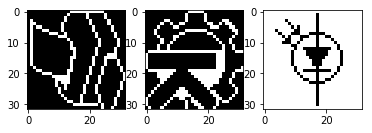

In [14]:
p1, p2, p3 = data[0], data[1], data[2]
plt.subplot(131)
plt.imshow(p1.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)

plt.subplot(132)
plt.imshow(p2.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)

plt.subplot(133)
plt.imshow(p3.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)

plt.show()

In [15]:
X = np.array([p1, p2, p3]).T
model = HopfieldNetwork()
model.train(X)

In [16]:
# 1. Check that the three patterns are stable

In [17]:
rp1 = model.update(p1)
print(rp1, (rp1 == p1).all())

rp2 = model.update(p2)
print(rp2, (rp2 == p2).all())

rp3 = model.update(p3)
print(rp3, (rp3 == p3).all())

[-1. -1. -1. ... -1. -1. -1.] True
[-1. -1. -1. ... -1. -1. -1.] True
[1. 1. 1. ... 1. 1. 1.] True


In [18]:
# 2. Try if the network can complete degraded patterns: p10 and p11

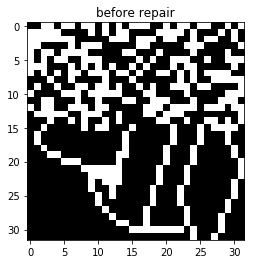

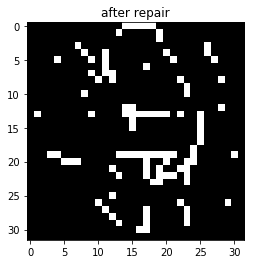

In [19]:
p10, p11 = data[9], data[10]
plt.imshow(p10.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
plt.title("before repair")
plt.show()
rp10 = model.update(p10)
plt.imshow(rp10.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
plt.title("after repair")
plt.show()

True


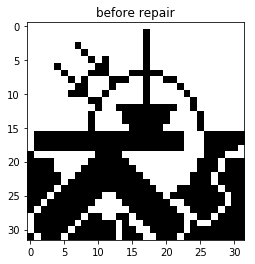

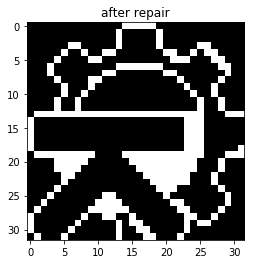

In [20]:
rp11 = model.update(p11)
print((rp11 == p2).all())

plt.imshow(p11.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
plt.title("before repair")
plt.show()

plt.imshow(rp11.reshape((32, 32)), cmap='gray', vmin=-1, vmax=1.)
plt.title("after repair")
plt.show()

In [21]:
# 3. Select units randomly, calculate the new states and repeat the process

## 3.3 Energy